# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# imports


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import tensorflow.keras
from tensorflow.keras import models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator

from	tensorflow.keras.models import	Sequential
from	tensorflow.keras.layers import	Dense,	Activation
from scipy.stats import zscore
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv3D
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix


# Print Config


In [3]:
#comment to turn off, prints more data.
def show_allData(all):
  if all:
    np.set_printoptions(threshold=np.inf) #numpy show whole array
    pd.set_option('display.max_rows', None) #pandas show whole dataframe
  else:
    np.set_printoptions(threshold=6) #numpy show whole array
    pd.set_option('display.max_rows', 6)

# Read CSV

In [4]:
# Folder path of the data
folder="/content/drive/Shareddrives/Team 8- Neural Network/Final Project/ECBE329_Project/ECBE329_Project"


## Parse Data


In [5]:
def get_data(rescale, img_size, class_mode, color_mode, zoom_range, horizontal_flip, 
             vertical_flip, validation_split,batch_size):
    """
    Function to read data from folder data path and returns 
    training and valid data
    Note: class_mode is default to sparse for this data set

    :param img_size:  Tuple of integers (height, width), defaults 
                      to (256, 256). The dimensions to which all 
                      images found will be resized.

    :param color_mode:"grayscale" or "rgb"

    :param zoom_range: Float or [lower, upper]. Range for random zoom. If a
                         float, [lower, upper] = [1-zoom_range, 1+zoom_range].

    :param horizontal_flip:  Boolean. Randomly flip inputs horizontally.

    :param vertical_flip:  Boolean. Randomly flip inputs vertical.

    :param validation_split: Float. Fraction of images reserved for validation 
                            (strictly between 0 and 1)
    :return: Tuple. training data, validation data.
    """
    # class_mode="sparse"

    datagen = ImageDataGenerator(
            rescale=rescale,
            zoom_range=zoom_range,
            shear_range=0.2,
            horizontal_flip=horizontal_flip,
            vertical_flip=vertical_flip,
            validation_split=validation_split)

    train_generator = datagen.flow_from_directory(
                      folder,
                      target_size=img_size,
                      class_mode=class_mode,
                      color_mode=color_mode,
                      batch_size=batch_size,
                      subset='training') # set as training data
    
    validation_generator = datagen.flow_from_directory(
                          folder, # same directory as training data
                          target_size=img_size,
                          class_mode=class_mode,
                          color_mode=color_mode,
                          batch_size=batch_size,
                          subset='validation') # set as validation data
    
    return train_generator, validation_generator
                              

# **Note:**
For `class_mode` in `get_data()` we need to use the specific `loss` for `compiler()` which is listed below.

Data   --->  Model Compiler


---
`class_mode` --> `loss` 
*   "sparse-->"sparse_categorical_crossentropy"
*   "categorical"-->"categorical_crossentropy"

## **Selecting Optimizer:**
We will select each optimizer to test our models
* **`SGD`**: very basic and is seldom used now. One problem is with the global learning rate associated with the same. Hence it doesn't work well when the parameters are in different scales since a low learning rate will make the learning slow while a large learning rate might lead to oscillations.
* **`RMSprop`**
* **`Adam`** : combines the good properties of Adadelta and RMSprop and hence tend to do better for most of the problems.
* **`Adagrad`** : penalizes the learning rate too harshly for parameters which are frequently updated and gives more learning rate to sparse parameters,
* **`Adamax`**: is a variant of Adam based on the infinity norm
* **`Nadam`**:is Adam RMSprop with Nesterov momentum.

## Get data
To use rgb specify,

`color_mode`=`"rgb"`

`input_shape = (img_height,img_weidth,3)`


To use grayscale specify 

`color_mode`= `"grayscale"` 

`input_shape = (img_height,img_weidth,1)`



# Model 1

In [ ]:
img_height=384
img_weidth=512

img_size=(img_height,img_weidth)

epochs=100
batch_size=64 

train_generator,validation_generator = get_data(rescale=1./255,
                                                img_size=img_size,
                                                color_mode= "grayscale",
                                                class_mode="categorical",
                                                batch_size=batch_size,
                                                zoom_range=0.2, 
                                                horizontal_flip=True, 
                                                vertical_flip=False, 
                                                validation_split=0.2)

# n_image=train_generator.samples
input_shape = (img_height,img_weidth,1)
train_generator.class_indices

Found 1816 images belonging to 5 classes.
Found 454 images belonging to 5 classes.


{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4}

In [ ]:
# build the model object
model1 = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
#padding="same"
model1.add(Conv2D(20, kernel_size=(5, 5), padding='valid',activation='relu',input_shape=input_shape))

# POOL_1: downsample the image to choose the best features 
model1.add(MaxPooling2D(pool_size=(2,2))) #pooling
model1.add(Dropout(0.2))
model1.add(Conv2D(40, kernel_size=(5, 5), padding='valid',activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))


# flatten since too many dimensions, we only want a classification output
model1.add(Flatten())

# FC_1: fully connected to get all relevant data
model1.add(Dense(100, activation='relu'))

# output a softmax to squash the matrix into output probabilities for the 10 classes
model1.add(Dense(5, activation='softmax'))

model1.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 380, 508, 20)      520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 190, 254, 20)      0         
_________________________________________________________________
dropout (Dropout)            (None, 190, 254, 20)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 186, 250, 40)      20040     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 93, 125, 40)       0         
_________________________________________________________________
flatten (Flatten)            (None, 465000)            0         
_________________________________________________________________
dense (Dense)                (None, 100)               4

In [ ]:
# compile the model
model1.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy']) 


In [ ]:
history1=model1.fit(
        train_generator,
        steps_per_epoch = train_generator.samples // batch_size,
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // batch_size,
        epochs = epochs)

Epoch 1/100
28/28 [==============================] - 44s 1s/step - loss: 52.1218 - accuracy: 0.2098 - val_loss: 1.6083 - val_accuracy: 0.2433
Epoch 2/100
28/28 [==============================] - 37s 1s/step - loss: 1.6907 - accuracy: 0.2610 - val_loss: 1.6006 - val_accuracy: 0.2701
Epoch 3/100
28/28 [==============================] - 37s 1s/step - loss: 1.5495 - accuracy: 0.2721 - val_loss: 1.5243 - val_accuracy: 0.3147
Epoch 4/100
28/28 [==============================] - 37s 1s/step - loss: 1.7676 - accuracy: 0.3324 - val_loss: 1.5326 - val_accuracy: 0.2835
Epoch 5/100
28/28 [==============================] - 37s 1s/step - loss: 1.7875 - accuracy: 0.3596 - val_loss: 1.5230 - val_accuracy: 0.3438
Epoch 6/100
28/28 [==============================] - 37s 1s/step - loss: 1.4806 - accuracy: 0.3591 - val_loss: 1.5520 - val_accuracy: 0.2991
Epoch 7/100
28/28 [==============================] - 37s 1s/step - loss: 1.4735 - accuracy: 0.3922 - val_loss: 1.5472 - val_accuracy: 0.3013
Epoch 8/100


## Result

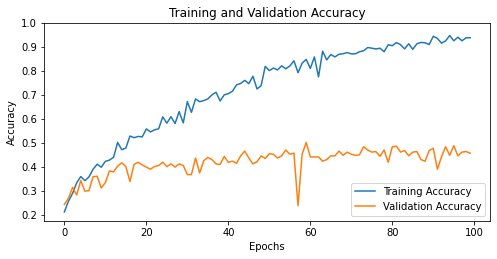

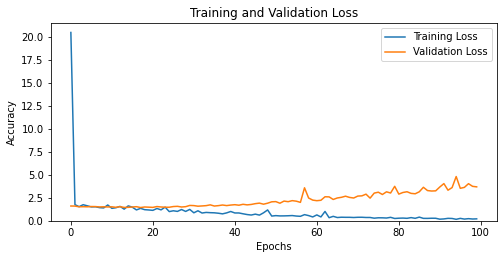

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

# Training and Validation Accuracy Graph
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()


# Training and Validation Loss Graph
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.ylim([0,max(plt.ylim())]) 
plt.title('Training and Validation Loss')
plt.show()



In [ ]:
# Confusion matrix
Y_pred = model1.predict_generator(validation_generator, validation_generator.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print()
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
print()
target_names = ['cardboard', 'glass','metal', 'paper', 'plastic']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '



Confusion Matrix
[[12 17  9 21 17]
 [13 21 18 23 21]
 [ 9 17 14 20 16]
 [17 24 21 32 20]
 [17 20 15 27 13]]
Classification Report

              precision    recall  f1-score   support

   cardboard       0.18      0.16      0.17        76
       glass       0.21      0.22      0.22        96
       metal       0.18      0.18      0.18        76
       paper       0.26      0.28      0.27       114
     plastic       0.15      0.14      0.15        92

    accuracy                           0.20       454
   macro avg       0.20      0.20      0.20       454
weighted avg       0.20      0.20      0.20       454



# Model 2 (best)

In [6]:
img_height=384
img_weidth=512

img_size=(img_height,img_weidth)

epochs=100
batch_size=64 

train_generator,validation_generator = get_data(rescale=1./255,
                                                img_size=img_size,
                                                color_mode= "grayscale",
                                                class_mode="sparse",
                                                batch_size=batch_size,
                                                zoom_range=0.2, 
                                                horizontal_flip=True, 
                                                vertical_flip=False, 
                                                validation_split=0.2)
# n_image=train_generator.samples
input_shape = (img_height,img_weidth,1)

Found 1816 images belonging to 5 classes.
Found 454 images belonging to 5 classes.


In [7]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(5,activation='softmax'))

In [9]:
model2.compile(optimizer='Adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history2 = model2.fit(train_generator, epochs=epochs, 
                    validation_data=validation_generator)

Epoch 1/100
29/29 [==============================] - 664s 22s/step - loss: 8.2138 - accuracy: 0.2138 - val_loss: 1.5845 - val_accuracy: 0.2247
Epoch 2/100
29/29 [==============================] - 37s 1s/step - loss: 1.5608 - accuracy: 0.2057 - val_loss: 1.5104 - val_accuracy: 0.2930
Epoch 3/100
29/29 [==============================] - 37s 1s/step - loss: 1.4744 - accuracy: 0.3243 - val_loss: 1.4863 - val_accuracy: 0.3502
Epoch 4/100
29/29 [==============================] - 37s 1s/step - loss: 1.3893 - accuracy: 0.3856 - val_loss: 1.4313 - val_accuracy: 0.4053
Epoch 5/100
29/29 [==============================] - 37s 1s/step - loss: 1.2922 - accuracy: 0.4624 - val_loss: 1.4167 - val_accuracy: 0.4119
Epoch 6/100
29/29 [==============================] - 37s 1s/step - loss: 1.2600 - accuracy: 0.4950 - val_loss: 1.4120 - val_accuracy: 0.4097
Epoch 7/100
29/29 [==============================] - 37s 1s/step - loss: 1.2213 - accuracy: 0.5135 - val_loss: 1.4163 - val_accuracy: 0.4339
Epoch 8/100

## Result

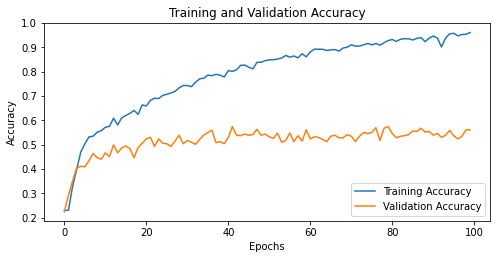

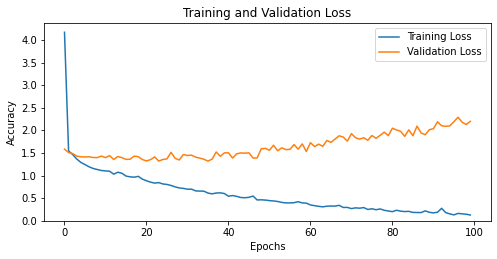

In [11]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Training and Validation Accuracy Graph
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()


# Training and Validation Loss Graph
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.ylim([0,max(plt.ylim())]) 
plt.title('Training and Validation Loss')
plt.show()



In [12]:
# Confusion matrix
Y_pred = model2.predict_generator(validation_generator, validation_generator.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print()
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
print()
target_names = ['cardboard', 'glass','metal', 'paper', 'plastic']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '



Confusion Matrix
[[ 9 22  8 25 12]
 [16 30 12 25 13]
 [ 7 30 15 16  8]
 [11 33 22 38 10]
 [ 8 29 11 22 22]]
Classification Report

              precision    recall  f1-score   support

   cardboard       0.18      0.12      0.14        76
       glass       0.21      0.31      0.25        96
       metal       0.22      0.20      0.21        76
       paper       0.30      0.33      0.32       114
     plastic       0.34      0.24      0.28        92

    accuracy                           0.25       454
   macro avg       0.25      0.24      0.24       454
weighted avg       0.25      0.25      0.25       454



# Model 3


In [ ]:
img_height=384
img_weidth=512
img_size=(img_height,img_weidth)
epochs=100
batch_size=64 

train_generator,validation_generator = get_data(rescale=1./255,
                                                img_size=img_size,
                                                color_mode= "grayscale",
                                                class_mode="sparse",
                                                batch_size=batch_size,
                                                zoom_range=0.2, 
                                                horizontal_flip=True, 
                                                vertical_flip=False, 
                                                validation_split=0.2)
# n_image=train_generator.samples
input_shape = (img_height,img_weidth,1)

Found 1816 images belonging to 5 classes.
Found 454 images belonging to 5 classes.


In [ ]:
model3 = Sequential()

model3.add(Conv2D(32,(5,5), activation = 'relu', input_shape = input_shape))
model3.add(MaxPooling2D(pool_size = (2,2)))

model3.add(Conv2D(64,(5,5), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))

model3.add(Flatten())
model3.add(Dense(64, activation='relu'))

model3.add(Dense(5, activation='softmax'))
model3.compile(optimizer="rmsprop",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model3.fit(
        train_generator,
        steps_per_epoch = train_generator.samples // batch_size,
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // batch_size,
        epochs = epochs)

Epoch 1/100
28/28 [==============================] - 46s 1s/step - loss: 100.1885 - accuracy: 0.2605 - val_loss: 2.3641 - val_accuracy: 0.1496
Epoch 2/100
28/28 [==============================] - 39s 1s/step - loss: 1.7222 - accuracy: 0.2158 - val_loss: 2.7779 - val_accuracy: 0.2545
Epoch 3/100
28/28 [==============================] - 39s 1s/step - loss: 1.8653 - accuracy: 0.3099 - val_loss: 1.5853 - val_accuracy: 0.3013
Epoch 4/100
28/28 [==============================] - 39s 1s/step - loss: 3.2799 - accuracy: 0.2776 - val_loss: 1.5566 - val_accuracy: 0.3549
Epoch 5/100
28/28 [==============================] - 39s 1s/step - loss: 2.0198 - accuracy: 0.2777 - val_loss: 1.5004 - val_accuracy: 0.3571
Epoch 6/100
28/28 [==============================] - 39s 1s/step - loss: 1.6424 - accuracy: 0.3062 - val_loss: 1.5528 - val_accuracy: 0.3415
Epoch 7/100
28/28 [==============================] - 39s 1s/step - loss: 1.5112 - accuracy: 0.3842 - val_loss: 2.6529 - val_accuracy: 0.2232
Epoch 8/100

# Reference

* [Distributing data](https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator#comment117797844_52372042)

* [Example of multi-class](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

* [Accuracy vs validation graph](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

* [Keras input shape](https://stackoverflow.com/questions/54098364/understanding-channel-in-convolution-neural-network-cnn-input-shape-and-output)

* [Confusion matrix](https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045)








